# Sentiment Analysis of Stock News

## Introduction
For this project, our aim is to utilize machine learning model to perform sentiment analysis on daily stock news in order to determine the positivity or negativity associated with each stock.

## 1. Import Libraries

In [123]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Extract News Headlines

We are going to prepare a URL to extract stock news headlines from the website 'https://finviz.com/'. 

In [124]:
# prepare url to extract stock news headlines. 
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN','COIN','TSLA','MSFT','META','GOOGL']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker
    
    # request the HTML data
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    print(response)
    
    # take the response and put it into BeautifulSoup to show the HTML code
    html = BeautifulSoup(response, 'html')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    


## 3. Parse and Manipulate News Headlines Data


In [125]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):
        
        if row.a is not None:  # Check if the row contains an anchor tag

            title = row.a.text
            date_data = row.td.text.split(' ')

            if len(date_data) == 1:
                time = date_data[0]
            else:
                date = date_data[0]
                time = date_data[1]

            parsed_data.append([ticker, date, time, title])
            
print(parsed_data[0])

['AMZN', 'Mar-21-23', '05:56PM', 'Nvidia Revolutionizes the Cloud -- What Nvidia Investors Should Know']


## 4. Conduct Sentiment Analysis 


In [126]:
df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])
# df.head()

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)

df.head()


,ticker,date,time,title,compound
0,AMZN,Mar-21-23,05:56PM,Nvidia Revolutionizes the Cloud -- What Nvidia...,0.0000
1,AMZN,Mar-21-23,04:44PM,Best Stock to Buy: Amazon vs. Salesforce,0.7096
2,AMZN,Mar-21-23,04:24PM,Big Tech companies could see even more layoffs...,0.0000
3,AMZN,Mar-21-23,04:15PM,"Why Rivian, Ford, and General Motors Jumped Today",0.0000
4,AMZN,Mar-21-23,03:39PM,Amazon looking at every nook and cranny to imp...,0.7351


## 5. Visualize Sentiment Analysis 

In [127]:
# convert the date from normal string to a recognizable date format
df['date'] = pd.to_datetime(df.date).dt.date

plt.figure(figsize=(16,8))

mean_df = df.groupby(['ticker', 'date']).mean()

mean_df

compound
ticker date                
AMZN   2023-03-14  0.636900
       2023-03-15  0.234192
       2023-03-16  0.123440
       2023-03-17  0.212427
       2023-03-18  0.129283
       2023-03-19 -0.421500
       2023-03-20  0.093926
       2023-03-21  0.226671
COIN   2023-03-07 -0.158983
       2023-03-08 -0.133525
       2023-03-09 -0.042357
       2023-03-10 -0.120420
       2023-03-11 -0.127650
       2023-03-12 -0.102120
       2023-03-13 -0.141690
       2023-03-14 -0.065778
       2023-03-15  0.290550
       2023-03-16 -0.029100
       2023-03-17  0.060140
       2023-03-18  0.440400
       2023-03-20  0.060756
       2023-03-21  0.181007
GOOGL  2023-03-17  0.050229
       2023-03-18  0.368700
       2023-03-19  0.562450
       2023-03-20  0.146910
       2023-03-21  0.050573
META   2023-03-14  0.048712
       2023-03-15  0.006400
       2023-03-16 -0.126675
       2023-03-17 -0.052185
       2023-03-18 -0.184580
       2023-03-19  0.421500
       2023-03-20 -0.005262
       2023-03-21 -0.087104
MSFT   2023-03-16  0.122384
       2023-03-17  0.160735
       2023-03-18  0.119175
       2023-03-19  0.397725
       2023-03-20  0.086856
       2023-03-21  0.047603
TSLA   2023-03-15 -0.128814
       2023-03-16  0.069960
       2023-03-17  0.091829
       2023-03-18  0.153229
       2023-03-19  0.118789
       2023-03-20  0.114573
       2023-03-21  0.064048

<Figure size 1600x800 with 0 Axes>

In [128]:
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()

In [129]:
mean_df

ticker,AMZN,COIN,GOOGL,META,MSFT,TSLA
date,,,,,,
2023-03-07,NaN,-0.158983,NaN,NaN,NaN,NaN
2023-03-08,NaN,-0.133525,NaN,NaN,NaN,NaN
2023-03-09,NaN,-0.042357,NaN,NaN,NaN,NaN
2023-03-10,NaN,-0.120420,NaN,NaN,NaN,NaN
2023-03-11,NaN,-0.127650,NaN,NaN,NaN,NaN
2023-03-12,NaN,-0.102120,NaN,NaN,NaN,NaN
2023-03-13,NaN,-0.141690,NaN,NaN,NaN,NaN
2023-03-14,0.636900,-0.065778,NaN,0.048712,NaN,NaN
2023-03-15,0.234192,0.290550,NaN,0.006400,NaN,-0.128814


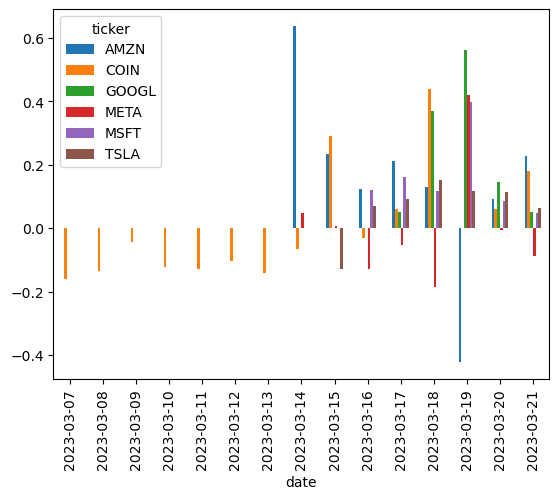

In [130]:
mean_df.plot(kind='bar')
plt.show()